In [30]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [31]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [32]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('data/new/case_maret_july.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset

array([[  38.],
       [  50.],
       [  14.],
       [  44.],
       [  36.],
       [  51.],
       [  71.],
       [  46.],
       [  43.],
       [  51.],
       [  37.],
       [  98.],
       [  26.],
       [  14.],
       [  75.],
       [  93.],
       [  81.],
       [  81.],
       [  80.],
       [ 148.],
       [ 144.],
       [ 109.],
       [ 167.],
       [  91.],
       [  93.],
       [ 179.],
       [ 160.],
       [ 107.],
       [  98.],
       [ 223.],
       [ 153.],
       [  79.],
       [ 131.],
       [  79.],
       [ 167.],
       [ 120.],
       [ 107.],
       [  99.],
       [  76.],
       [  65.],
       [  86.],
       [ 118.],
       [  83.],
       [ 105.],
       [ 145.],
       [  72.],
       [  62.],
       [  55.],
       [ 169.],
       [  68.],
       [  66.],
       [ 126.],
       [  57.],
       [ 182.],
       [  55.],
       [ 108.],
       [ 134.],
       [ 180.],
       [  62.],
       [ 116.],
       [ 127.],
       [  74.],
       [

In [33]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.00571565],
       [0.00857347],
       [0.        ],
       [0.00714456],
       [0.00523934],
       [0.00881162],
       [0.01357466],
       [0.00762086],
       [0.00690641],
       [0.00881162],
       [0.00547749],
       [0.02000476],
       [0.00285782],
       [0.        ],
       [0.01452727],
       [0.018814  ],
       [0.01595618],
       [0.01595618],
       [0.01571803],
       [0.03191236],
       [0.03095975],
       [0.02262443],
       [0.03643725],
       [0.0183377 ],
       [0.018814  ],
       [0.03929507],
       [0.03477018],
       [0.02214813],
       [0.02000476],
       [0.04977376],
       [0.03310312],
       [0.01547988],
       [0.02786378],
       [0.01547988],
       [0.03643725],
       [0.02524411],
       [0.02214813],
       [0.02024291],
       [0.01476542],
       [0.01214575],
       [0.01714694],
       [0.0247678 ],
       [0.01643248],
       [0.02167183],
       [0.03119791],
       [0.01381281],
       [0.01143129],
       [0.009

In [41]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [40]:
len(train)

283

In [42]:
len(test)

140

In [35]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [49]:
print(len(trainX))
print(len(testX))

279
136


In [50]:
print(len(trainY))
print(len(testY))

279
136


In [52]:
trainX.shape[1]

1

In [37]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

ValueError: cannot reshape array of size 837 into shape (279,1,1)

In [20]:
trainX

array([[[0.01544401, 0.02702703, 0.05405405]],

       [[0.02702703, 0.05405405, 0.04826255]],

       [[0.05405405, 0.04826255, 0.03281853]],

       [[0.04826255, 0.03281853, 0.05984557]],

       [[0.03281853, 0.05984557, 0.08494207]],

       [[0.05984557, 0.08494207, 0.08494207]],

       [[0.08494207, 0.08494207, 0.06177607]],

       [[0.08494207, 0.06177607, 0.02895753]],

       [[0.06177607, 0.02895753, 0.        ]],

       [[0.02895753, 0.        , 0.02702703]],

       [[0.        , 0.02702703, 0.02123553]],

       [[0.02702703, 0.02123553, 0.04247104]],

       [[0.02123553, 0.04247104, 0.07142857]],

       [[0.04247104, 0.07142857, 0.05984557]],

       [[0.07142857, 0.05984557, 0.04054055]],

       [[0.05984557, 0.04054055, 0.08687258]],

       [[0.04054055, 0.08687258, 0.12741312]],

       [[0.08687258, 0.12741312, 0.12741312]],

       [[0.12741312, 0.12741312, 0.10424709]],

       [[0.12741312, 0.10424709, 0.05598456]],

       [[0.10424709, 0.05598456, 0.01930

In [21]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
92/92 - 0s - loss: 0.0797
Epoch 2/100
92/92 - 0s - loss: 0.0385
Epoch 3/100
92/92 - 0s - loss: 0.0234
Epoch 4/100
92/92 - 0s - loss: 0.0182
Epoch 5/100
92/92 - 0s - loss: 0.0162
Epoch 6/100
92/92 - 0s - loss: 0.0145
Epoch 7/100
92/92 - 0s - loss: 0.0130
Epoch 8/100
92/92 - 0s - loss: 0.0116
Epoch 9/100
92/92 - 0s - loss: 0.0103
Epoch 10/100
92/92 - 0s - loss: 0.0092
Epoch 11/100
92/92 - 0s - loss: 0.0082
Epoch 12/100
92/92 - 0s - loss: 0.0074
Epoch 13/100
92/92 - 0s - loss: 0.0068
Epoch 14/100
92/92 - 0s - loss: 0.0064
Epoch 15/100
92/92 - 0s - loss: 0.0058
Epoch 16/100
92/92 - 0s - loss: 0.0054
Epoch 17/100
92/92 - 0s - loss: 0.0051
Epoch 18/100
92/92 - 0s - loss: 0.0050
Epoch 19/100
92/92 - 0s - loss: 0.0049
Epoch 20/100
92/92 - 0s - loss: 0.0047
Epoch 21/100
92/92 - 0s - loss: 0.0046
Epoch 22/100
92/92 - 0s - loss: 0.0045
Epoch 23/100
92/92 - 0s - loss: 0.0045
Epoch 24/100
92/92 - 0s - loss: 0.0045
Epoch 25/100
92/92 - 0s - loss: 0.0043
Epoch 26/100
92/92 - 0s - loss: 0.

In [22]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [24]:
testPredict

array([[0.48365366],
       [0.46824938],
       [0.4606117 ],
       [0.5794174 ],
       [0.6340143 ],
       [0.58671075],
       [0.45404404],
       [0.37794167],
       [0.35092282],
       [0.4365412 ],
       [0.45477808],
       [0.40342504],
       [0.48398554],
       [0.46113688],
       [0.47222275],
       [0.6000245 ],
       [0.66952044],
       [0.6318231 ],
       [0.42303437],
       [0.37646335],
       [0.3573326 ],
       [0.43329972],
       [0.48879206],
       [0.4432338 ],
       [0.5492233 ],
       [0.5270472 ],
       [0.5384058 ],
       [0.62441903],
       [0.7177991 ],
       [0.67113477],
       [0.45551062],
       [0.39922965],
       [0.40475184],
       [0.52119756],
       [0.5537184 ],
       [0.48360205],
       [0.53214383],
       [0.6091655 ],
       [0.5981969 ],
       [0.67015773],
       [0.7762976 ],
       [0.6633756 ],
       [0.44689608],
       [0.43222892]], dtype=float32)

In [25]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [26]:
testPredict

array([[354.5326 ],
       [346.5532 ],
       [342.59686],
       [404.13824],
       [432.41943],
       [407.9162 ],
       [339.19482],
       [299.7738 ],
       [285.778  ],
       [330.12833],
       [339.57504],
       [312.97418],
       [354.7045 ],
       [342.86893],
       [348.6114 ],
       [414.8127 ],
       [450.8116 ],
       [431.2844 ],
       [323.13184],
       [299.00803],
       [289.09827],
       [328.44928],
       [357.19427],
       [333.59512],
       [388.49765],
       [377.01047],
       [382.8942 ],
       [427.44907],
       [475.81998],
       [451.64783],
       [339.9545 ],
       [310.80093],
       [313.66147],
       [373.98032],
       [390.82614],
       [354.50586],
       [379.65048],
       [419.54773],
       [413.86603],
       [451.14172],
       [506.1222 ],
       [447.62857],
       [335.49216],
       [327.89456]], dtype=float32)

In [27]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.22 RMSE
Test Score: 64.64 RMSE


In [28]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

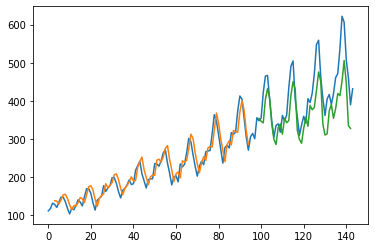

In [29]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()